# Classification Model for Medical appointment - no shows
# Subhashini Natarajan

In [45]:
# Load required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [54]:
# Read the data into dataframe

data = pd.read_csv("/Users/manikantanvenkataraman/Downloads/KaggleV2-May-2016.csv")
data.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [55]:
# Obtain the number of records

print(len(data))

110527


In [56]:
# Obtain distinct number of values in every field

for column in list(data.columns):
    print("{0:25} {1}".format(column, data[column].nunique()))

PatientId                 62299
AppointmentID             110527
Gender                    2
ScheduledDay              103549
AppointmentDay            27
Age                       104
Neighbourhood             81
Scholarship               2
Hipertension              2
Diabetes                  2
Alcoholism                2
Handcap                   5
SMS_received              2
No-show                   2


In [58]:
# Obtain distinct values for the field gender

data.Gender.unique()

array(['F', 'M'], dtype=object)

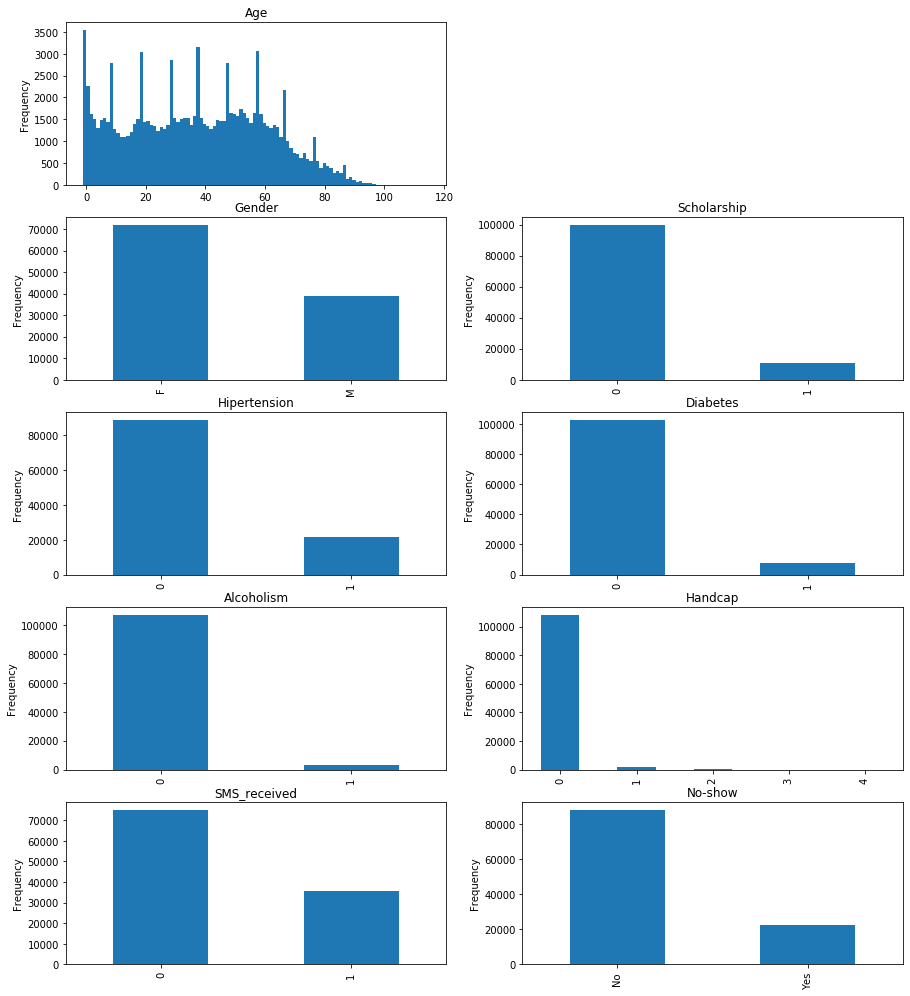

In [59]:
# Plot the distribution of values in the data 

def  feature_plots(vars):
    
    plt.figure(figsize=(15,24.5))
    
    for i, c in enumerate(['Age']):
        plt.subplot(7, 2, i+1)
        plt.hist(data[c], bins=len(data[c].unique()))
        plt.title(c)
        plt.ylabel('Frequency')
    
    for i, v in enumerate(vars):
        plt.subplot(7,2,i+3)
        data[v].value_counts().plot(kind = 'bar', title = v)
        plt.ylabel('Frequency')
        
vars= ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show' ]

feature_plots(vars)

In [60]:
# Assess for any invalid values for age

data[data['Age'] < 0]['Age'].value_counts().sum()

data = data[data['Age'] >= 0]

In [61]:
# Obtain the unique date values

data.AppointmentDay.unique()

array(['2016-04-29T00:00:00Z', '2016-05-03T00:00:00Z',
       '2016-05-10T00:00:00Z', '2016-05-17T00:00:00Z',
       '2016-05-24T00:00:00Z', '2016-05-31T00:00:00Z',
       '2016-05-02T00:00:00Z', '2016-05-30T00:00:00Z',
       '2016-05-16T00:00:00Z', '2016-05-04T00:00:00Z',
       '2016-05-19T00:00:00Z', '2016-05-12T00:00:00Z',
       '2016-05-06T00:00:00Z', '2016-05-20T00:00:00Z',
       '2016-05-05T00:00:00Z', '2016-05-13T00:00:00Z',
       '2016-05-09T00:00:00Z', '2016-05-25T00:00:00Z',
       '2016-05-11T00:00:00Z', '2016-05-18T00:00:00Z',
       '2016-05-14T00:00:00Z', '2016-06-02T00:00:00Z',
       '2016-06-03T00:00:00Z', '2016-06-06T00:00:00Z',
       '2016-06-07T00:00:00Z', '2016-06-01T00:00:00Z',
       '2016-06-08T00:00:00Z'], dtype=object)

In [62]:
# Convert gender values to 0 and 1

gender_mapping = {'M' : 0, 'F' : 1}
data['Gender'] = data['Gender'].map(gender_mapping)


In [63]:
# Convert categorical values into 1 and 0 using get dummies method

dummies = pd.get_dummies(data[['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']], drop_first=True)

data = pd.concat([data.drop(['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],axis=1), dummies],axis=1)
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show_Yes
0,2.987250e+13,5642903,1,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,0,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,1,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,1,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,1,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [78]:
# Obtain correlation for No show

data.corr()['No-show_Yes']

PatientId       -0.001456
AppointmentID   -0.162597
Gender           0.004122
Age             -0.060327
Scholarship      0.029134
Hipertension    -0.035704
Diabetes        -0.015181
Alcoholism      -0.000197
Handcap         -0.006077
SMS_received     0.126428
No-show_Yes      1.000000
Name: No-show_Yes, dtype: float64

In [64]:
# Define function for model performance

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import kernel_approximation
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_approximation import (RBFSampler,Nystroem)
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

def model_performance(model_name, X_train, y_train, y_test, Y_pred):
    print('Model name: %s'%model_name)
    print('Test accuracy (Accuracy Score): %f'%metrics.accuracy_score(y_test, Y_pred))
    print('Test accuracy (ROC AUC Score): %f'%metrics.roc_auc_score(y_test, Y_pred))
    print('Train accuracy: %f'%clf.score(X_train, y_train))
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, Y_pred)
    print('Area Under the Precision-Recall Curve: %f'%metrics.auc(fpr, tpr))
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, Y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [67]:
# Split the data into train-test

from sklearn import metrics
from sklearn.model_selection import train_test_split

features_of_choice = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received']
x = np.array(data[features_of_choice])
y = np.array(data['No-show_Yes'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [68]:
# Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.798601
Test accuracy (ROC AUC Score): 0.500578
Train accuracy: 0.798082
Area Under the Precision-Recall Curve: 0.106990


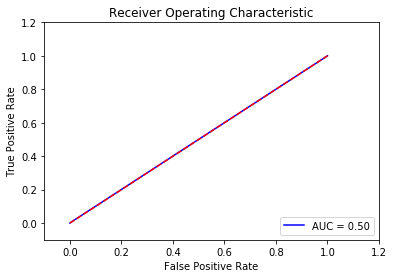

In [69]:
# Test prediction and score for decision tree classifier

y_pred = clf.predict(x_test)
model_performance('Decision tree classifier', x_train, y_train, y_test,y_pred)

In [70]:
# Kernel approximation/SGD Classifier 

rbf_feature = kernel_approximation.RBFSampler(gamma=1, random_state=1)
X_train = rbf_feature.fit_transform(x_train)
clf = SGDClassifier()
clf.fit(X_train, y_train)

SGDClassifier()

Model name: Kernel approximation
Test accuracy (Accuracy Score): 0.798751
Test accuracy (ROC AUC Score): 0.500000
Train accuracy: 0.797772
Area Under the Precision-Recall Curve: 0.399376


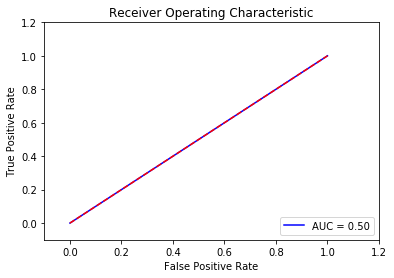

In [71]:
# Test prediction and score for Kernel approximation

X_test = rbf_feature.fit_transform(x_test)
Y_pred = clf.predict(X_test)
model_performance('Kernel approximation', X_train, y_train, y_test, Y_pred)

In [72]:
# Random forest classifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier()

Model name: Random Forest
Test accuracy (Accuracy Score): 0.798601
Test accuracy (ROC AUC Score): 0.500578
Train accuracy: 0.798082
Area Under the Precision-Recall Curve: 0.106990


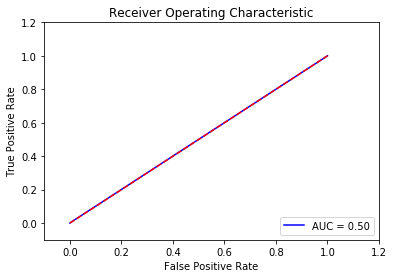

In [73]:
# Test prediction and score for Random forest classifier

y_pred = clf.predict(x_test)
model_performance('Random Forest', x_train, y_train, y_test, y_pred)

In [74]:
# Gradient boosting classifier

clf = GradientBoostingClassifier(random_state=10, learning_rate=0.1,n_estimators=200, max_depth=5, max_features=6)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Model name: Gradient Boosting
Test accuracy (Accuracy Score): 0.798480
Test accuracy (ROC AUC Score): 0.500503
Train accuracy: 0.798082
Area Under the Precision-Recall Curve: 0.081912


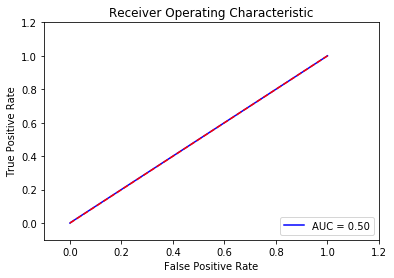

In [75]:
# Test prediction and score for Gradient boosting classifier

model_performance('Gradient Boosting', x_train, y_train, y_test, y_pred)

In [76]:
# Feature importance score 

for feature, score in zip(features_of_choice, list(clf.feature_importances_)):
        print('%s\t%f'%(feature, score))

Gender	0.016332
Scholarship	0.066204
Hipertension	0.070914
Diabetes	0.018665
Alcoholism	0.028442
Handcap	0.033037
SMS_received	0.766407
